In [181]:
%pylab inline
import pylab
import numpy as np
from scipy.special import erf
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


# TAREA 3 GEODINAMÍCA - Luis Alejandro Rodríguez Parra

Punto 1a: Make plots of T(x,z) for 3 different ridge half-spreading rates: "slow" (0.5 cm/year), "moderate" (4 cm/year) and "fast" (10 cm/year). Use colours or contours to display the temperature field in 2-D. Assume a thermal diffiusivity value of 10-6 m2/s. Use a "reasonable" range of x, y values. How do these 3 plots differ?

In [182]:
#Constantes
TsTo = 1300 #K
To = 273.15 #K
k = 10**-6 #Thermal Diffiusitivy (m^2/s)

#ARREGLO DE X y Y
x = np.linspace(-10000,10000,1000)
y = np.linspace(0,-15000,1000)
X,Y=np.meshgrid(x,y)
Q,W=np.meshgrid(x,y)
A,S=np.meshgrid(x,y)

In [183]:
def temp(x,y,v):
    return TsTo - (TsTo*erf(y/(2*np.sqrt(k*(abs(x)/v))))) + To

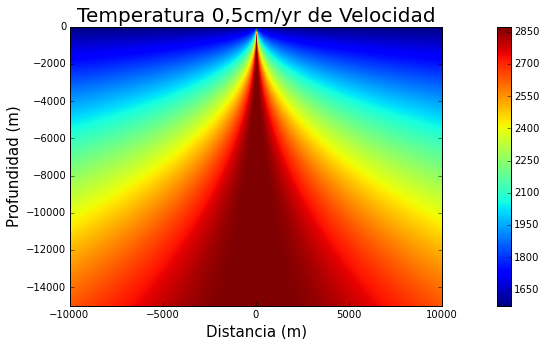

In [184]:
v1 = 0.5/(100*365*24*3600)
T= temp(X,Y,v1)
plt.subplots(figsize=(20, 5))
imshow(T,extent=[x.min(), x.max(), y.min(), y.max()])
cb=plt.colorbar()
plt.title('Temperatura 0,5cm/yr de Velocidad', fontsize=20)
plt.xlabel('Distancia (m)', fontsize=15)
plt.ylabel('Profundidad (m)', fontsize=15)

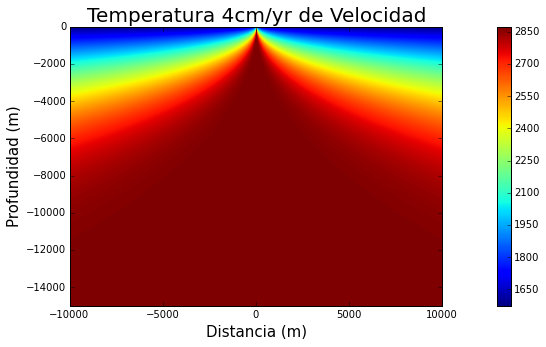

In [185]:
v2 = 4.0/(100*365*24*3600)
T2= temp(Q,W,v2)
plt.subplots(figsize=(20, 5))
imshow(T2,extent=[x.min(), x.max(), y.min(), y.max()])
cb=plt.colorbar()
plt.title('Temperatura 4cm/yr de Velocidad', fontsize=20)
plt.xlabel('Distancia (m)', fontsize=15)
plt.ylabel('Profundidad (m)', fontsize=15)

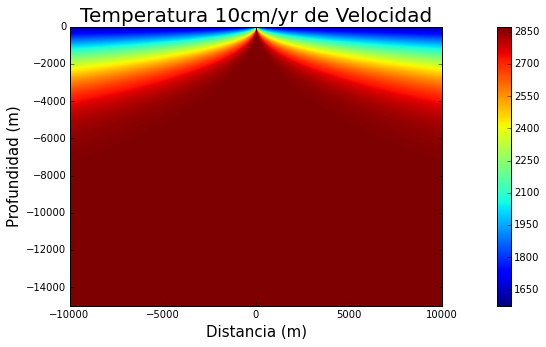

In [186]:
v3 = 10.0/(100*365*24*3600)
T3 = temp(A,S,v3)
plt.subplots(figsize=(20, 5))
imshow(T3,extent=[x.min(), x.max(), y.min(), y.max()])
cb=plt.colorbar()
plt.title('Temperatura 10cm/yr de Velocidad', fontsize=20)
plt.xlabel('Distancia (m)', fontsize=15)
plt.ylabel('Profundidad (m)', fontsize=15)

#Thermal boundary layer

Punto 1b: Now using the concept of a "thermal boundary layer" discussed in class, plot profiles showing the thickness of the thermal lithosphere as a function of x, for each of your 3 plates (slow/medium/fast).

In [187]:
def profun(x,v):
    return -2.32*sqrt(k*(abs(x)/v))

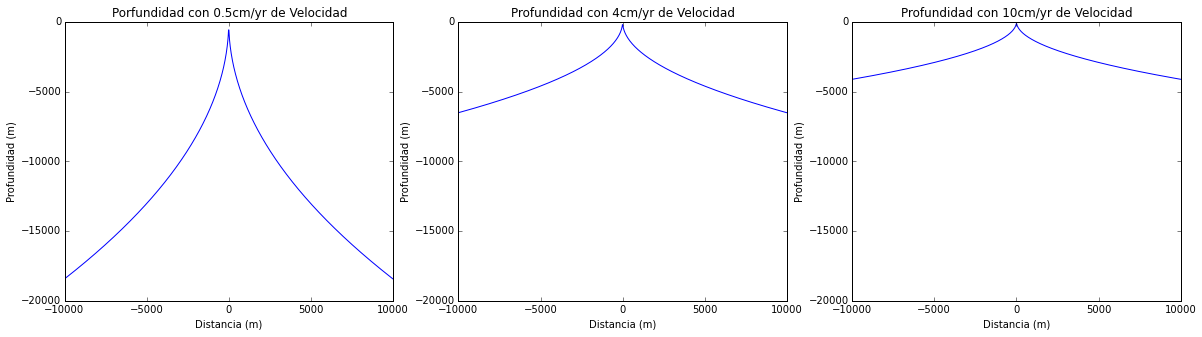

In [188]:
x = np.linspace(-10000,10000,1000)
fig = plt.subplots(nrows=1, ncols=3, figsize=(20, 5))
plt.subplot(1,3,1)
plot(x,profun(x,v1))
plt.title('Porfundidad con 0.5cm/yr de Velocidad', fontsize=12)
plt.xlabel('Distancia (m)', fontsize=10)
plt.ylabel('Profundidad (m)', fontsize=10)

plt.subplot(1,3,2)
plot(x,profun(x,v2))
plt.ylim(-20000,0)
plt.title('Profundidad con 4cm/yr de Velocidad', fontsize=12)
plt.xlabel('Distancia (m)', fontsize=10)
plt.ylabel('Profundidad (m)', fontsize=10)

plt.subplot(1,3,3)
plot(x,profun(x,v3))
plt.ylim(-20000,0)
plt.title('Profundidad con 10cm/yr de Velocidad', fontsize=12)
plt.xlabel('Distancia (m)', fontsize=10)
plt.ylabel('Profundidad (m)', fontsize=10)

plt.show()

# Oceanic bathymetry

Punto 1c: For each of the same 3 plates, calculate the ocean bathymetry (i.e. the surface topography of oceanic lithosphere), and plot it along with the plate thickness, to show a "cross section" of oceanic lithosphere as a function of x. in each case. Assume a thermal expansion coefficient α of 1.6x10-5 per °C and reasonable assumptions about densities.

In [189]:
rm = 3300  #kg/m3
rw = 1000  #kg/m3
alpha = 1.6*10**-5 
TmTs = 1200

def batime(x,v):
    return (-rm/(rm-rw))*alpha*TmTs*2*(sqrt(k*abs(x)/v)/sqrt(pi))

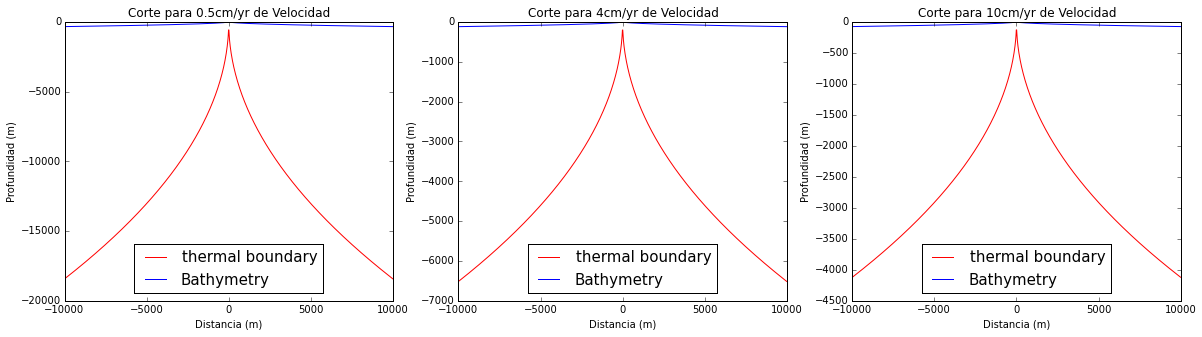

In [190]:
fig = plt.subplots(nrows=1, ncols=3, figsize=(20, 5))
plt.subplot(1,3,1)
plot(x,profun(x,v1), label= "thermal boundary", c='r')
plot(x,batime(x,v1), label= "Bathymetry", c='b')
plt.title('Corte para 0.5cm/yr de Velocidad', fontsize=12)
plt.xlabel('Distancia (m)', fontsize=10)
plt.ylabel('Profundidad (m)', fontsize=10)
legend(fontsize=15, loc='lower center')

plt.subplot(1,3,2)
plot(x,profun(x,v2), label= "thermal boundary", c='r')
plot(x,batime(x,v2), label= "Bathymetry", c='b')
plt.title('Corte para 4cm/yr de Velocidad', fontsize=12)
plt.xlabel('Distancia (m)', fontsize=10)
plt.ylabel('Profundidad (m)', fontsize=10)
legend(fontsize=15, loc='lower center')

plt.subplot(1,3,3)
plot(x,profun(x,v3), label= "thermal boundary", c='r')
plot(x,batime(x,v3), label= "Bathymetry", c='b')
plt.title('Corte para 10cm/yr de Velocidad', fontsize=12)
plt.xlabel('Distancia (m)', fontsize=10)
plt.ylabel('Profundidad (m)', fontsize=10)
legend(fontsize=15, loc='lower center')

plt.show()

#Relaxation times  

Punto 1d: In class we showed how the characteristic relaxation times of a Maxwell viscoelastic material vary exponentially with temperature. Plot a profile of the characteristic relaxation time as a function of temperature, using an the appropriate range of temperatures for oceanic crust (you may wish to use a logarithmic scale for the τ axis).

# Elastic/viscous transition

Punto 1e: Using your plot from part (d), estimate an "elastic/viscous transition temperature", i.e. an approximate temperature for which the behaviour of your material changes from being "elastic" on geological timescales, to "viscous" (you may wish to consider a range of values of relaxation time τ, since the transition will not be instantaneous - however, you should notice that the transition is fairly sharp). Plot your chosen elastic/viscous transition temperature as a function of x for oceanic lithosphere using T(x, y) for oceanic plates. Plot these along with the lithospheric profile plots you produced in part (c). How does the "thermal thickness" of the lithosphere compare with the "elastic thickness" of the lithosphere?